<a href="https://colab.research.google.com/github/911-shruti/LearningML/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#lOAD THE DATASET
df=pd.read_csv("/Life Expectancy Data.csv")

In [4]:
#reading first five rows of the dataset
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
#SANITY CHECK UP
#Find the shape of the dataset
df.shape

(2938, 22)

In [6]:
#Finding Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
#Finding NULL or missing values in the data
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [8]:
#Finding Duplicate values in the data
df.duplicated().sum()

np.int64(0)

In [9]:
#Finding the garbage data
for i in df.select_dtypes(include='object').columns:
  print(df.value_counts())

Country      Year  Status      Life expectancy   Adult Mortality  infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  GDP          Population   thinness  1-19 years   thinness 5-9 years  Income composition of resources  Schooling
Zimbabwe     2014  Developing  59.2              371.0            23             6.50     10.822595               91.0         0         31.3   34                  92.0   6.44               91.0         6.3        127.474620   15411675.0  5.9                    5.7                  0.498                            10.3         1
Zambia       2013  Developing  63.0              328.0            29             2.41     20.623063               79.0         35        22.3   42                  74.0   4.99               79.0         4.8        185.793359   1515321.0   6.4                    6.2                  0.565                            12.5         1
            

**EXPLORATORY DATA ANALYSIS**

In [10]:
#Descriptive Statistics
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


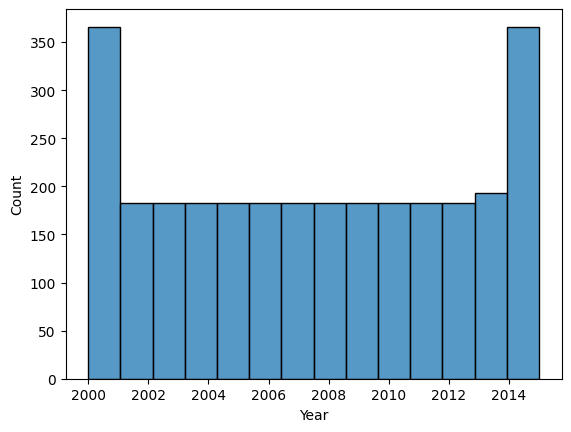

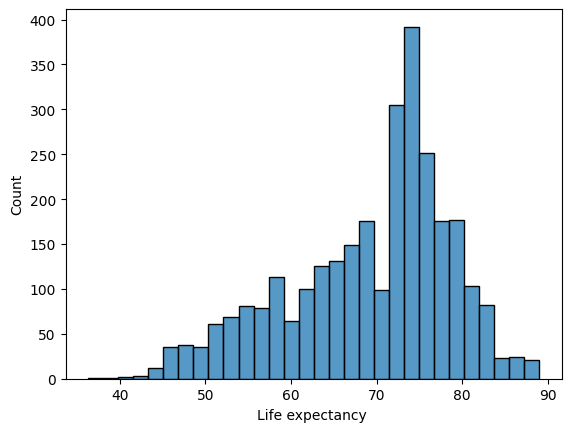

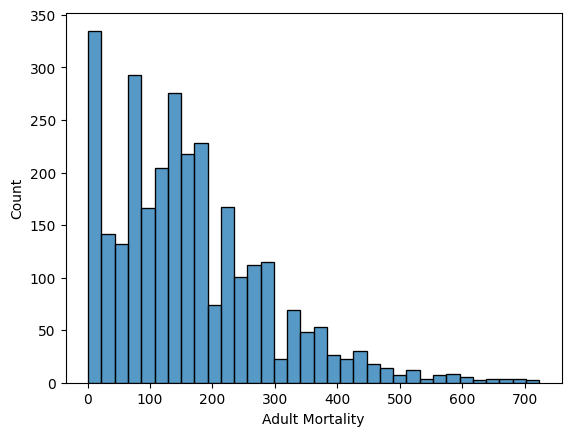

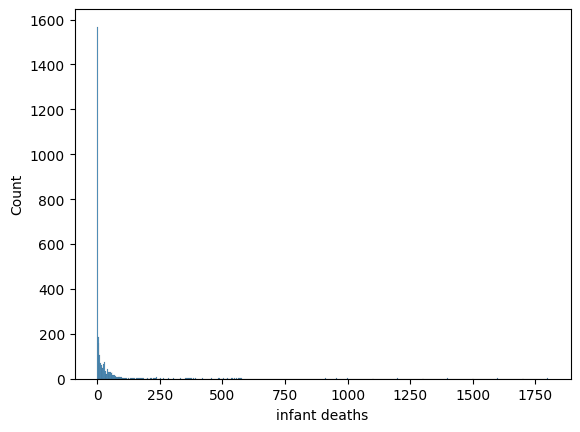

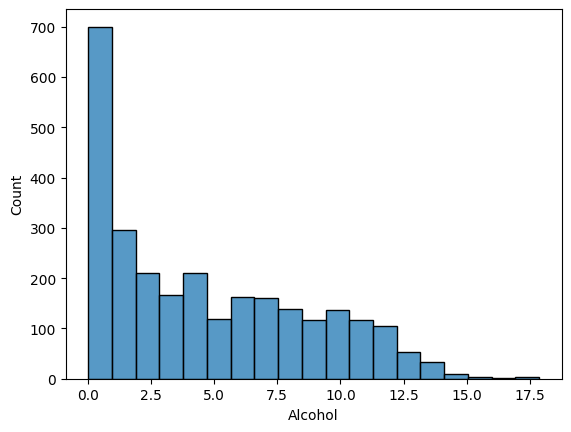

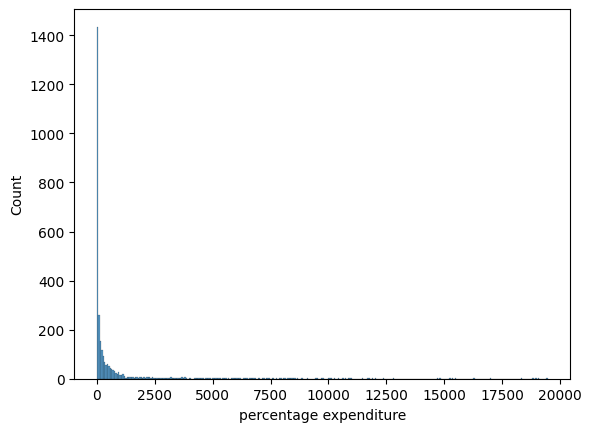

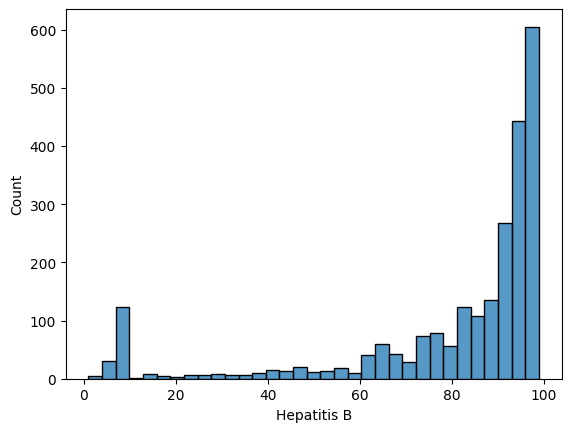

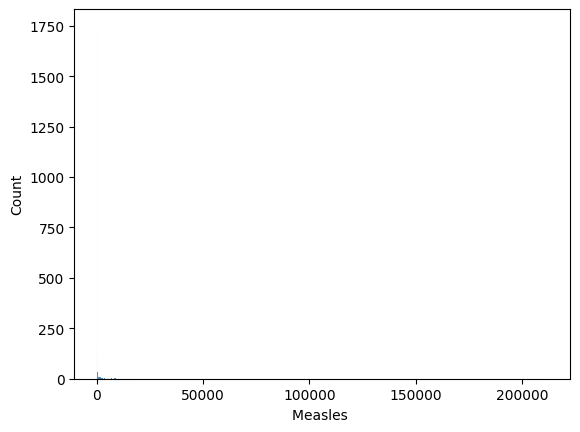

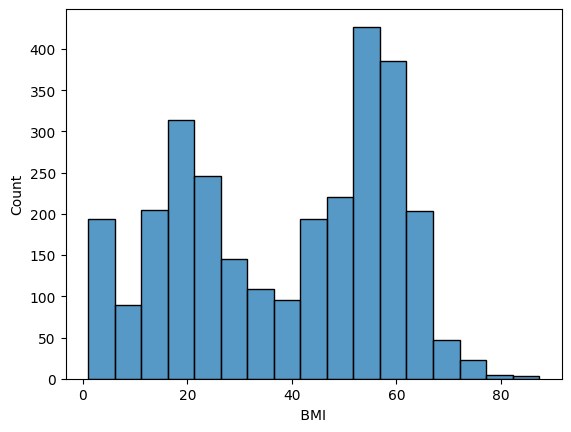

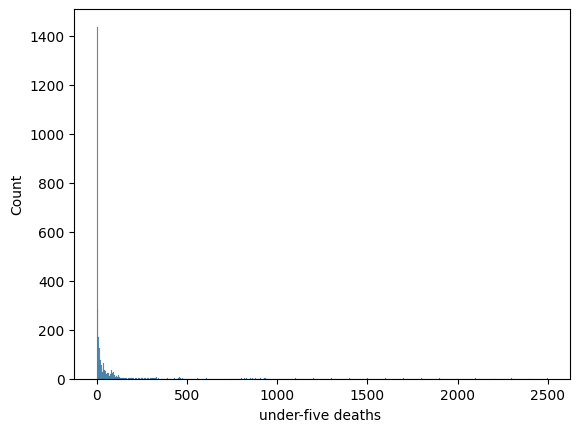

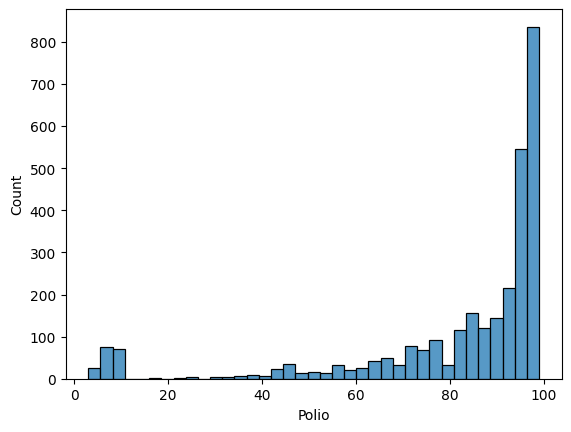

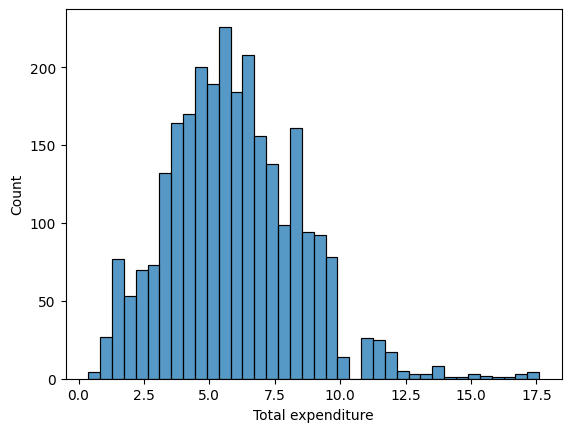

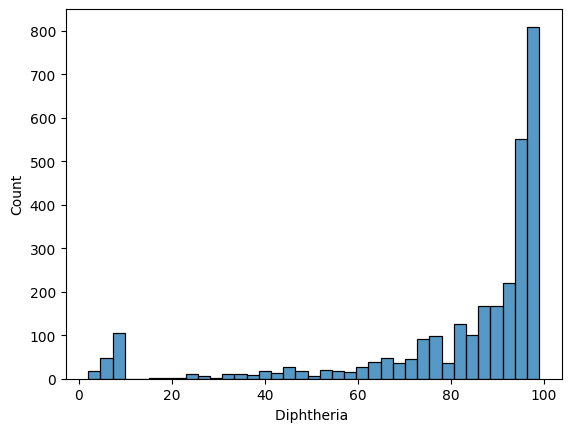

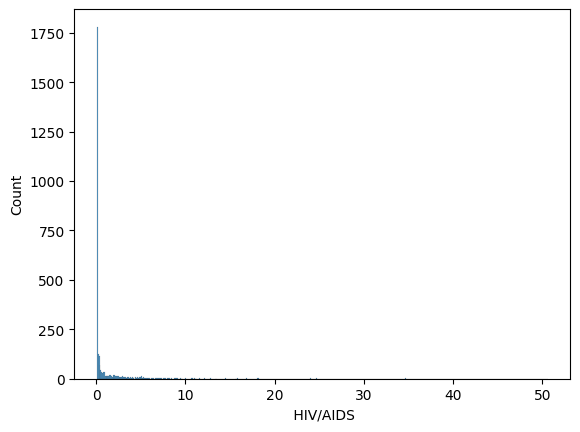

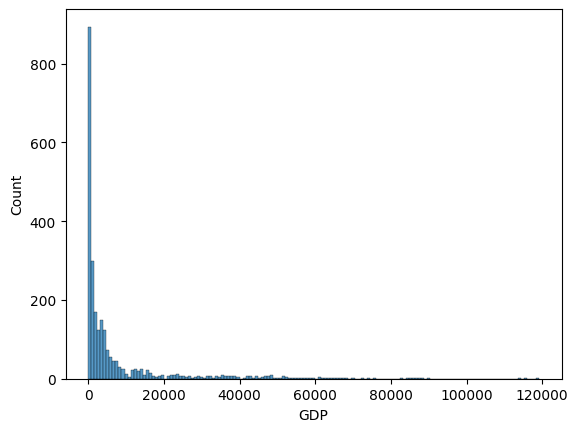

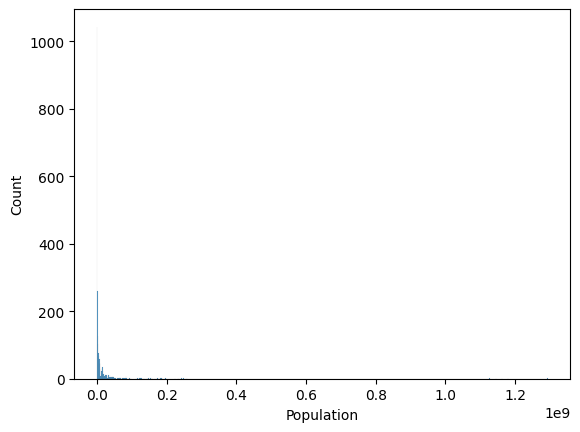

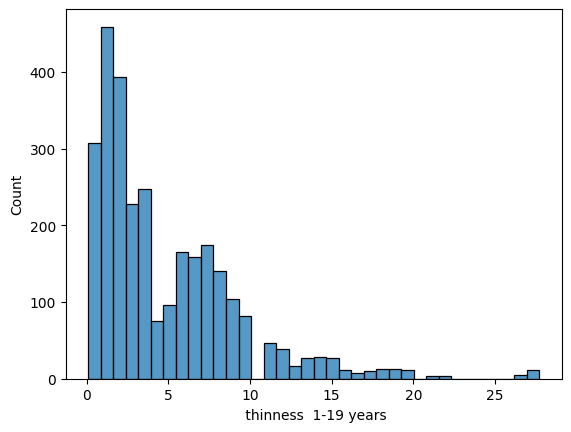

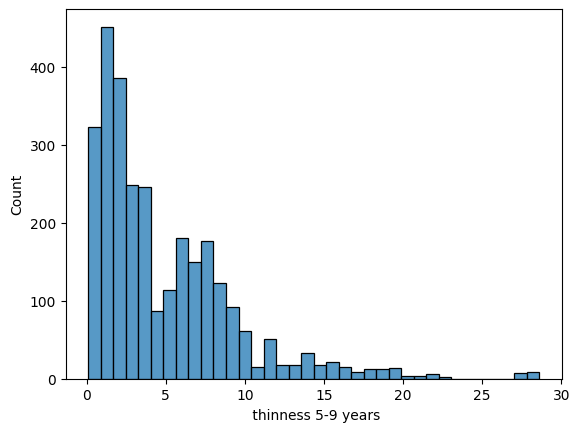

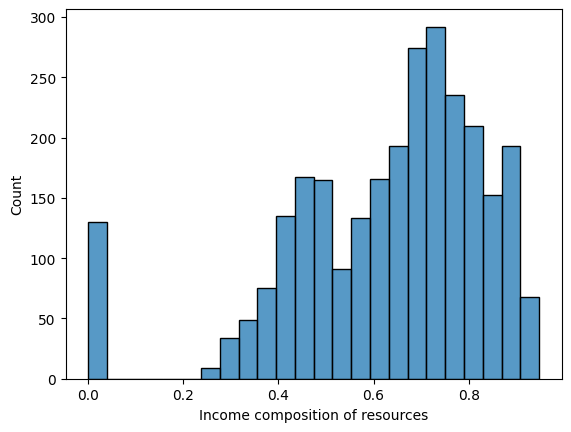

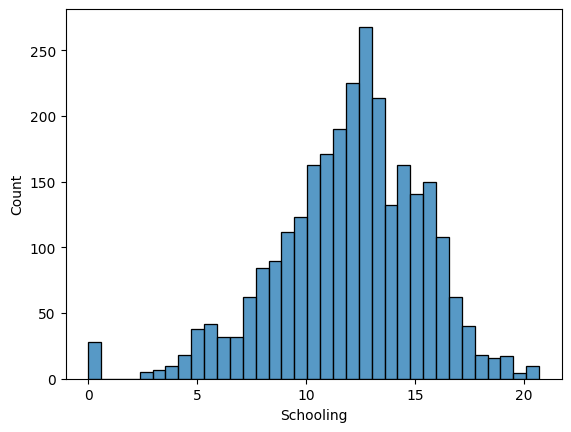

In [11]:
#Create histogram to see the data distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

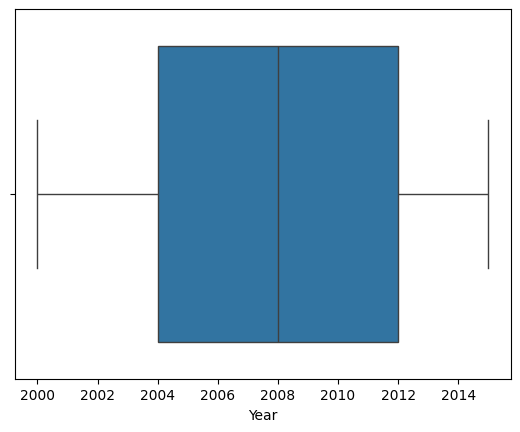

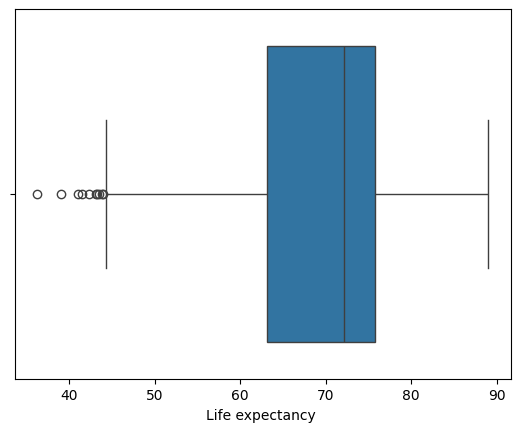

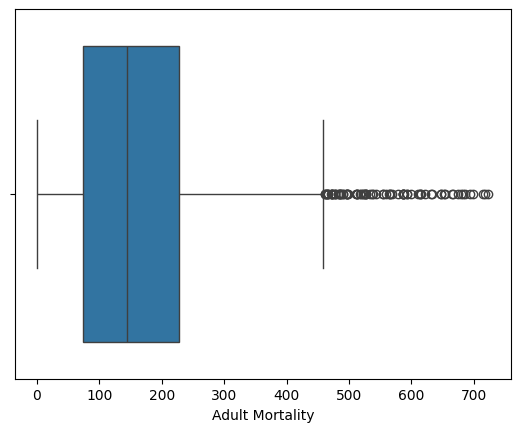

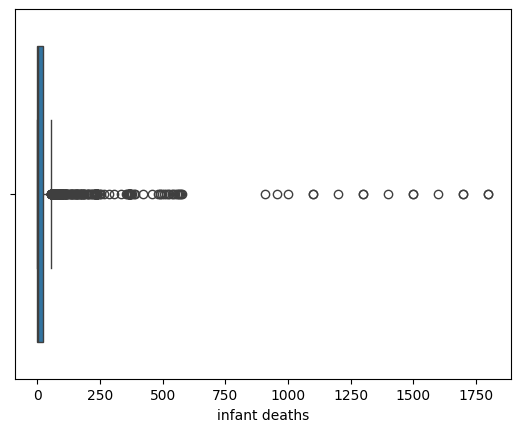

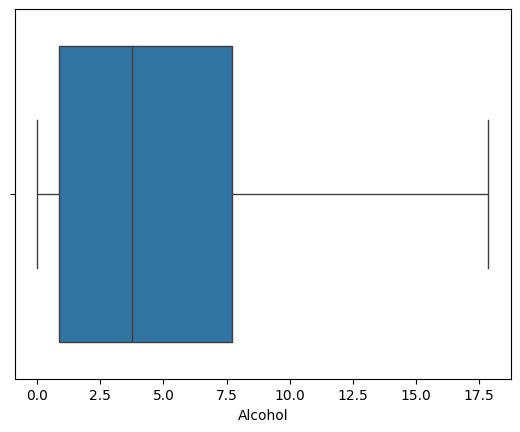

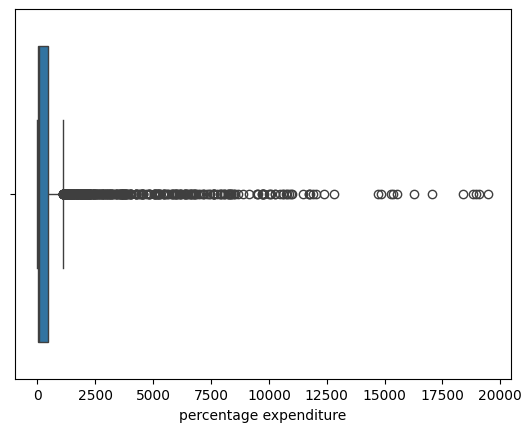

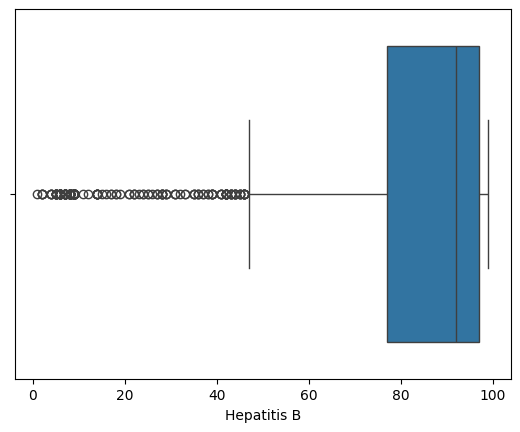

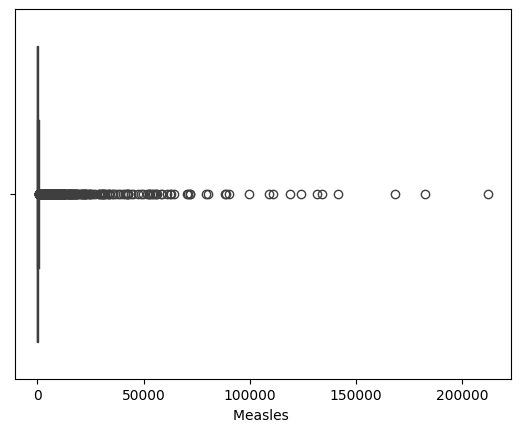

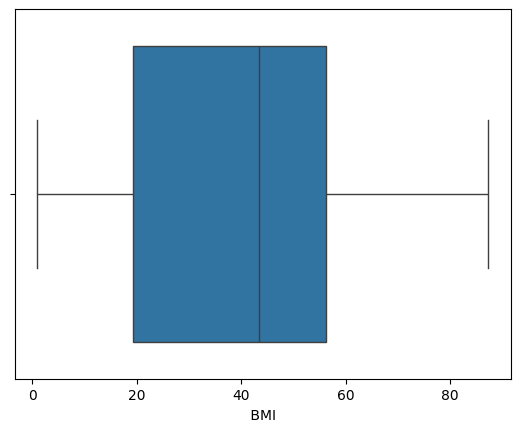

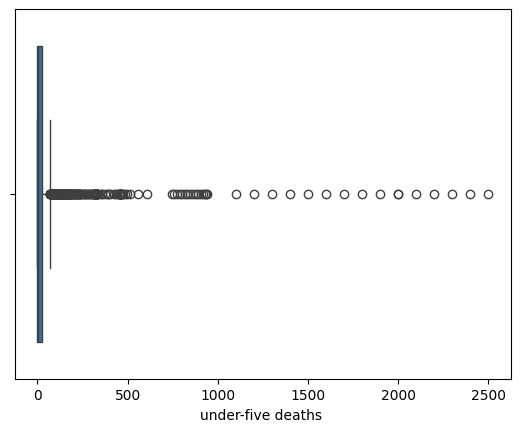

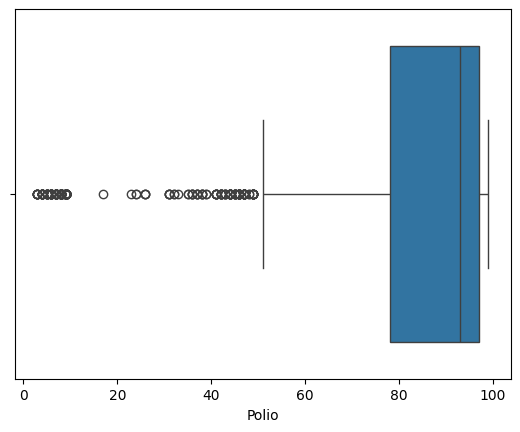

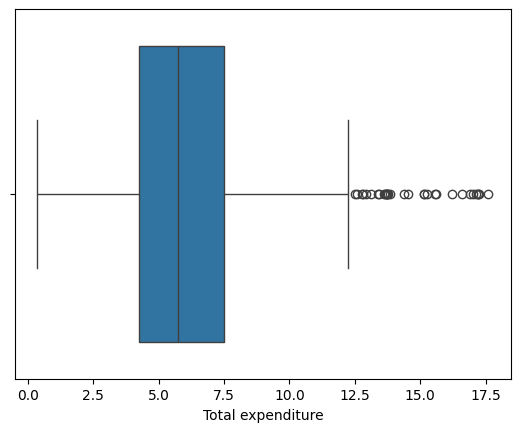

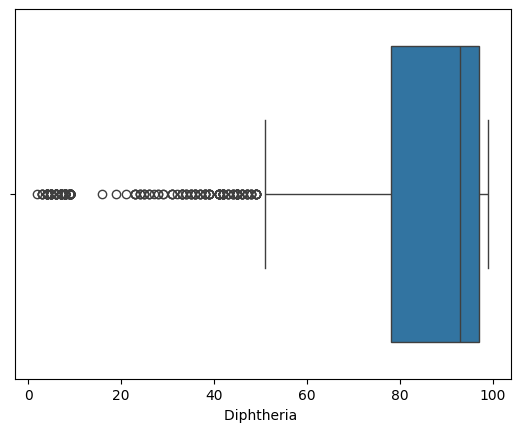

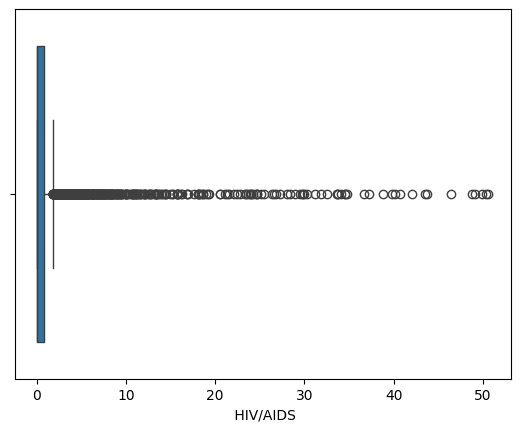

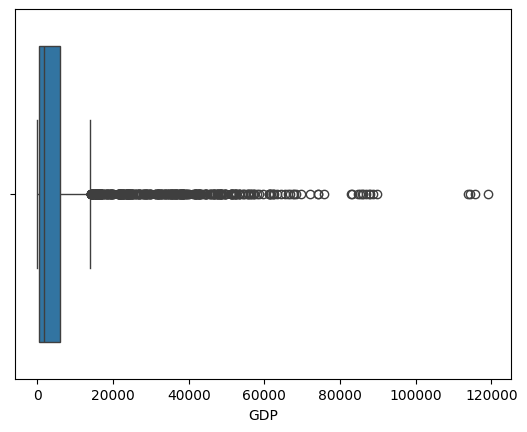

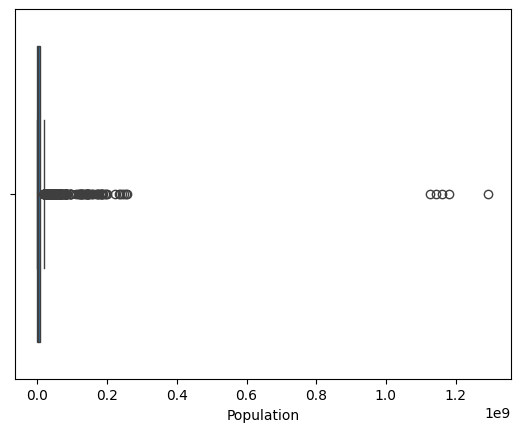

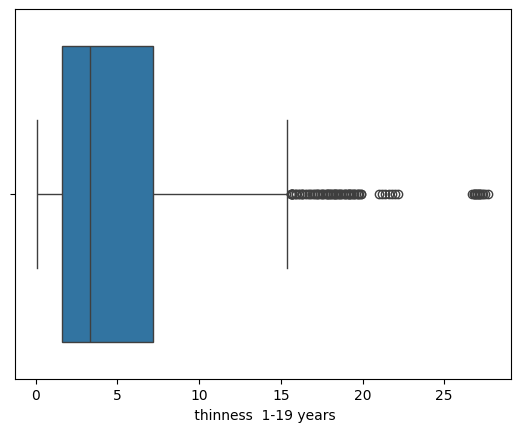

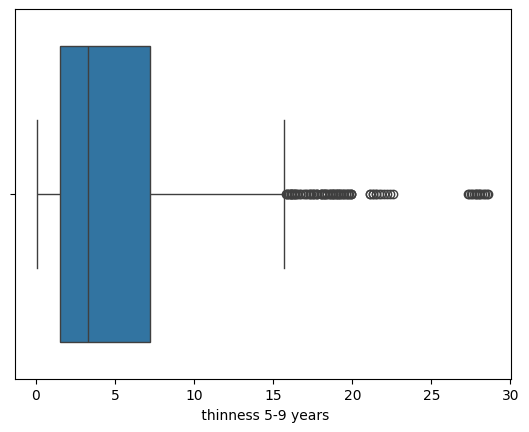

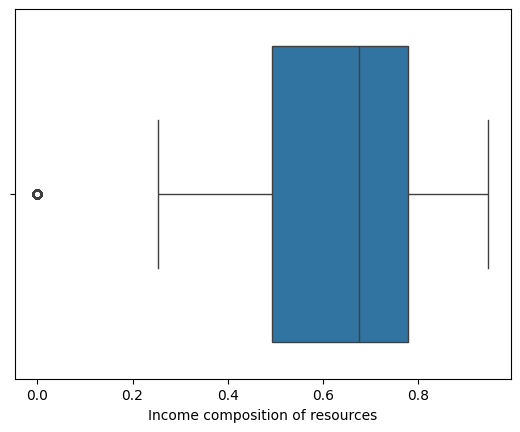

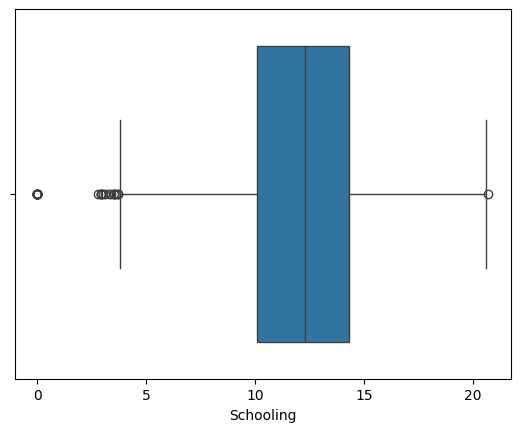

In [12]:
#Box Plot to Display the OUTLIER
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [13]:
#Scatter Plot to Display the relationship
df.select_dtypes(include="number").columns



Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

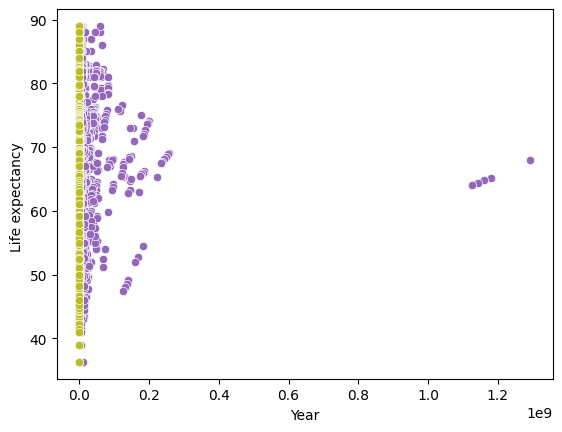

In [14]:
for i in ['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']:
  sns.scatterplot(data=df,x=i,y="Life expectancy ")

In [15]:
#Correlation with heatmap
s=df.select_dtypes(include="number").corr()

<Axes: >

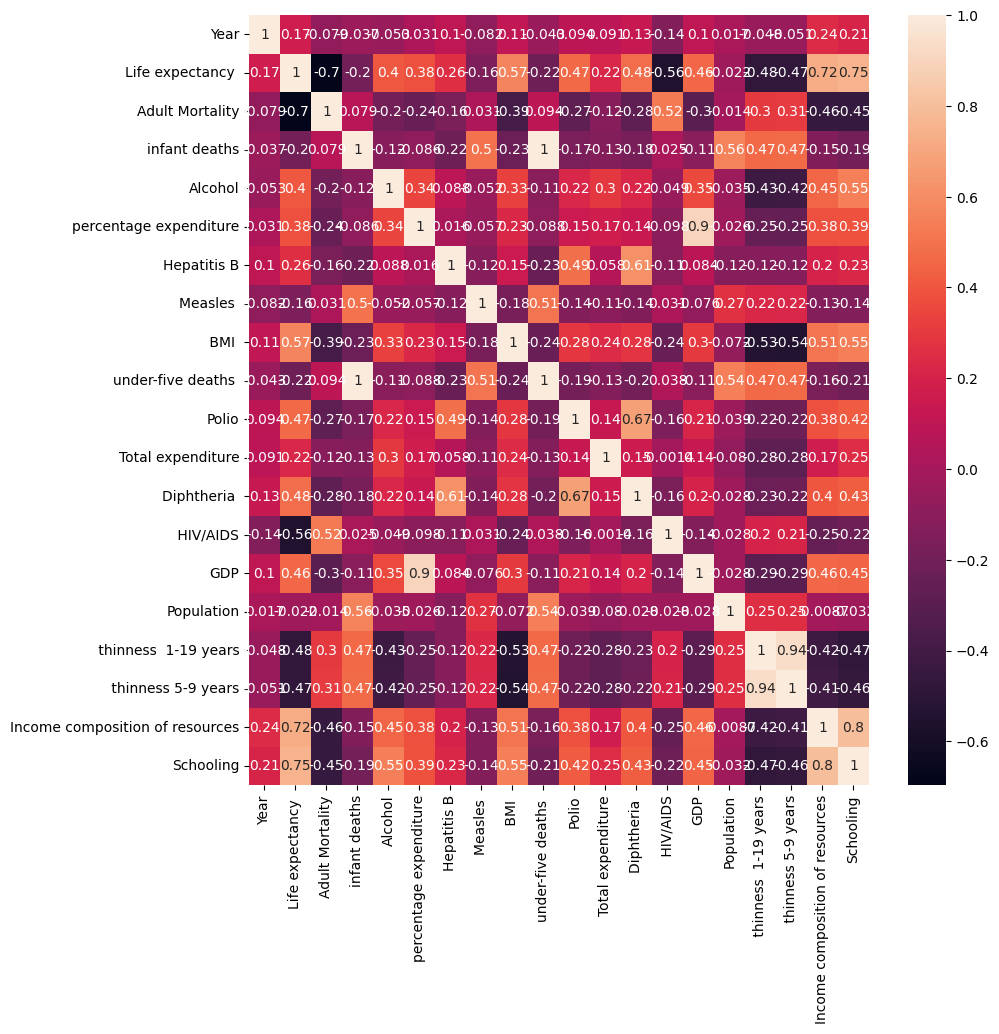

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)

**MISSING VALUE TREATEMENT**




In [17]:
#Display the missing values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [18]:
#CHOOSE A METHOD TO IMPUTING THE MISSING DATA
# LIKE MEAN,MEDIAN,MODE OR KNNIputer
#FILLING UP MISSING DATA WITH MEDIAN
for i in ['GDP','Population']:
  df[i].fillna(df[i].median(),inplace=True)

In [19]:
#Display the missing values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [20]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [21]:
for i in df.select_dtypes(include="number").columns:
  df[i]=impute.fit_transform(df[[i]])

In [22]:
#Display the missing values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [23]:
# Dealing with the outliers
def winker(col):
  q1=df[col].quantile(.25)
  q3=df[col].quantile(.75)
  iqr=q3-q1
  uw=q3+1.5*iqr
  lw=q1-1.5*iqr
  return lw,uw


In [24]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [27]:
df.columns = df.columns.str.strip()  # clean column names

for i in ['GDP', 'thinness 5-9 years']:
    lw, uw = winker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])


KeyError: "None of [Index([  584.25921,  612.696514,  631.744976,     669.959,   63.537231,\n         553.32894, 445.8932979, 373.3611163,  369.835796,   272.56377,\n       ...\n         65.824121,  325.678573, 396.9982166,  414.796232,   444.76575,\n        454.366654, 453.3511552,    57.34834,  548.587312, 547.3588785],\n      dtype='float64', length=2938)] are in the [columns]"

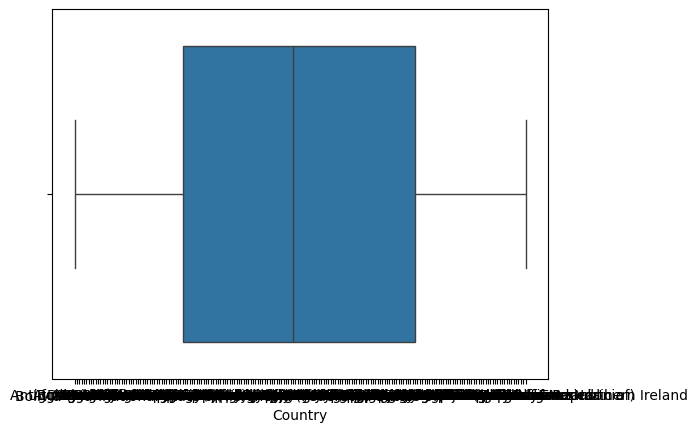

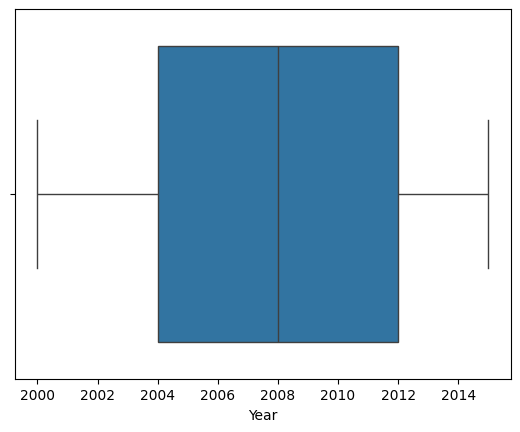

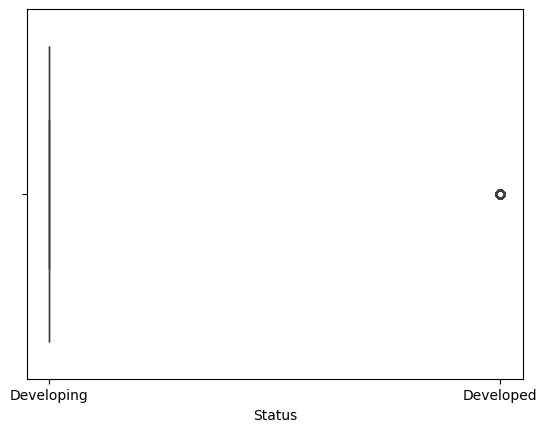

ValueError: Could not interpret value `Life expectancy ` for `x`. An entry with this name does not appear in `data`.

In [28]:
for i in ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']:
  sns.boxplot(data=df,x=i)
  plt.show()